In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Binomial Distribution
Fashion Trends Online (FTO) is an e-commerce company that sells women apparel. It is observed that 
10% of their customers return the items purchased by them for many reasons (such as size, color, and 
material mismatch). On a specific day, 20 customers purchased items from FTO. Calculate:
 1. Probability that exactly 5 customers will return the items.
 2. Probability that a maximum of 5 customers will return the items.
 3. Probability that more than 5 customers will return the items purchased by them.
 4. Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.

In [5]:
# 1. Probability that exactly 5 customers will return the items.
stats.binom.pmf(5, 20, 0.1)*100

3.1921361119954423

In [6]:
# So the probability that 5 customers return the items is 3.19 %.

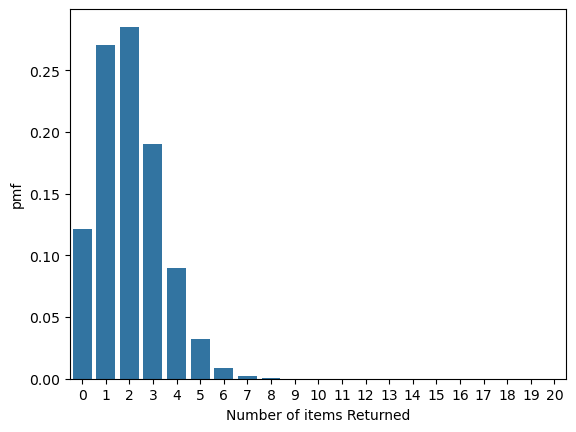

In [7]:
pmf_df = pd.DataFrame( { 'success': range(0,21), 'pmf': list(stats.binom.pmf( range(0,21), 20,  0.1 ) ) } ) 
sns.barplot( x = pmf_df.success, y = pmf_df.pmf ) 
plt.ylabel('pmf') 
plt.xlabel('Number of items Returned'); 

In [8]:
# 2. Probability that a maximum of 5 customers will return the items.
stats.binom.cdf(5,20,0.1)

0.988746865835491

In [9]:
# Probabilty of max.5 customers returning items is 98%.

In [10]:
# 3. Probability that more than 5 customers will return the items purchased by them.
1-stats.binom.cdf(5,20,0.1)

0.011253134164509015

In [11]:
# 4. Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns
mean, var = stats.binom.stats(20,0.1)
print("Average is {} and variance is {}".format(mean, var))

Average is 2.0 and variance is 1.8


## Poisson Distribution
The number of calls arriving at a call center follows a Poisson distribution at 10 calls per hour. 
1. Calculate the probability that the number of calls will be maximum 5.
2. Calculate the probability that the number of calls over a 3-hour period will exceed 30

In [12]:
# 1. Calculate the probability that the number of calls will be maximum 5
stats.poisson.cdf(5, 10)

0.06708596287903189

In [13]:
# 2. Calculate the probability that the number of calls over a 3-hour period will exceed 30.
1 - stats.poisson.cdf(30,30)

0.45164848742208863

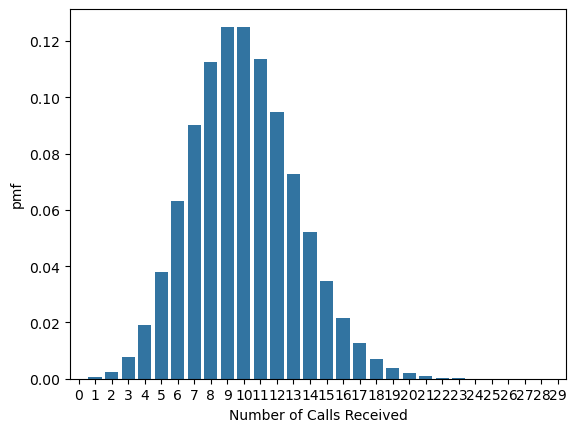

In [14]:
pmf_df = pd.DataFrame( { 'success': range(0,30), 'pmf': list(stats.poisson.pmf( range(0,30), 10) ) } )
sns.barplot( x = pmf_df.success, y = pmf_df.pmf ); 
plt.xlabel('Number of Calls Received'); 

## Exponential Distribution


The time-to-failure of an avionic system follows an exponential distribution with a mean time between 
failures (MTBF) of 1000 hours. Calculate
 1. The probability that the system will fail before 1000 hours.
 2. The probability that it will not fail up to 2000 hours.
 3. The time by which 10% of the system will fail (i.e., calculate P10 life).

In [15]:
# 1. The probability that the system will fail before 1000 hours.
stats.expon.cdf(1000,
               loc=1/1000, #(lambda),
               scale=1000)

0.6321201909489326

In [17]:
# 2. The probability that it will not fail up to 2000 hours.
1 - stats.expon.cdf(2000,
               loc=1/1000, #(lambda),
               scale=1000)

0.13533541857196352

In [18]:
# 3. The time by which 10% of the system will fail (i.e., calculate P10 life).
stats.expon.ppf(0.1, 
               loc=1/1000,
               scale=1000)

105.36151565782632

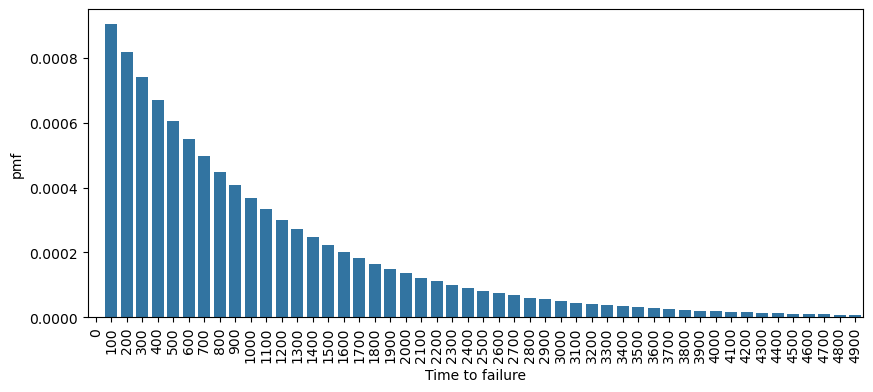

In [20]:
 pmf_df = pd.DataFrame( { 'success': range(0,5000, 100), 
'pmf':  
list(stats.expon.pdf( range(0,5000, 100), 
loc = 1/1000, 
scale = 1000 ) ) } ) 
plt.figure( figsize=(10,4)) 
sns.barplot( x = pmf_df.success, y = pmf_df.pmf ) 
plt.xticks(rotation=90); 
plt.xlabel('Time to failure'); 

## Normal Distribution

In [22]:
beml_df = pd.read_csv('BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [24]:
glaxo_df = pd.read_csv('GLAXO.csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [26]:
# we are working only with the 'Close' prices for each day so we will subset the dataframes.
beml_df = beml_df[['Close','Date']]
glaxo_df = glaxo_df[['Close','Date']]

In [28]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))  
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [29]:
glaxo_df.head()

,Close,Date
Date,,
2010-01-04,1625.65,2010-01-04
2010-01-05,1616.80,2010-01-05
2010-01-06,1638.50,2010-01-06
2010-01-07,1648.70,2010-01-07
2010-01-08,1639.80,2010-01-08


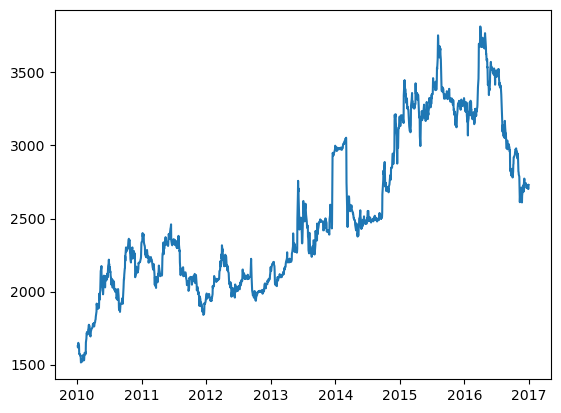

In [31]:
plt.plot(glaxo_df['Close'])

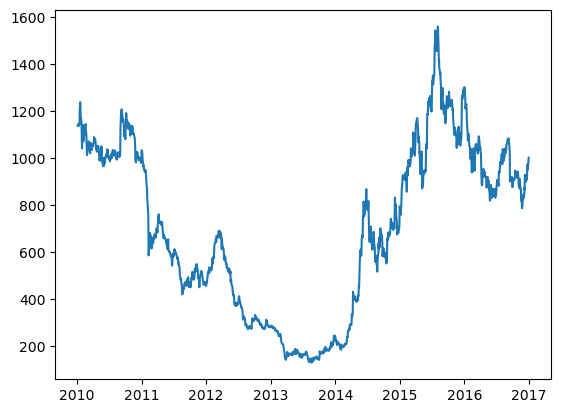

In [32]:
plt.plot(beml_df['Close'])